# GDS Import

Integrated circuit layout data is defined in GDS data which specifies the layout
geometry. Additionally, layer mapping and layer material information is defined in a
technology file.

This example demonstrates how to import GDS files and translate GDS data
into an EDB file along with some simplified technology data
for subsequent use in HFSS 3D Layout.

Keywords: **GDS**, **RFIC**

## Prerequisites

### Perform imports

In [1]:
import os
import tempfile
from pyedb import Edb
from pyedb.misc.downloads import download_file
from ansys.aedt.core.hfss3dlayout import  Hfss3dLayout

### Define constant
Constants help ensure consistency and avoid repetition throughout the example.

In [2]:
AEDT_VERSION= "2025.2"
NG_MODE = False  # Open AEDT UI when it is launched.

### Create temporary directory

Create a temporary working directory.
The name of the working folder is stored in ``temp_folder.name``.

> **Note:** The final cell in the notebook cleans up the temporary folder. If you want to
> retrieve the AEDT project and data, do so before executing the final cell in the notebook.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

### Import a GDS file.

Download the test case folder and copy it to the working directory. The 
method ``download_file()`` retrieves example data from the 
[Ansys GitHub "example_data" repository](https://github.com/ansys/example-data/tree/main/pyaedt).

The following files are used in this example:

- ``Model.xml`` defines physical information such
  as material properties, stackup layer names, and boundary conditions.
- ``Model.gds`` contains the GDS data for the layout.
- ``Model.map`` maps properties to stackup layers.

In [4]:
control_fn = "Model.xml"
gds_fn = "Model.gds"
layer_map = "Model.map"

local_path = download_file("gds", destination=temp_folder.name)
control_file = os.path.join(local_path, control_fn)
map_file = os.path.join(local_path, layer_map)
gds_in = os.path.join(local_path, gds_fn)

### Open the EDB

Each GDS file requires a control file (XML) or a technology file (IRCX, VLC.TECH, or ITF)
that maps the GDS geometry to a physical layer in the stackup.
The MAP file is also regularly used to map the stackup layers, and finally in some cases a layer filter (XML) is deployed, when
only a part of the stackup is needed.

Open the EDB by creating an instance of the ``Edb`` class.

In [5]:
edb = Edb(gds_in, control_file=control_file, map_file=map_file, version=AEDT_VERSION)

C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\generic\design_types.py:301: UserWarning: Your ANSYS AEDT version is eligible to gRPC version.You might consider switching to that version for better user experience.For more information please check this link: https://edb.docs.pyansys.com/version/dev/grpc_api/index.html
  warnings.warn(GRPC_GENERAL_WARNING, UserWarning)


PyEDB INFO: Star initializing Edb 10:23:21.226415


PyEDB INFO: Edb version 2025.2


PyEDB INFO: Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


PyEDB INFO: legacy v0.67.1


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB INFO: Translation successfully completed


PyEDB INFO: Database Model.aedb Opened in 2025.2


PyEDB INFO: Cell IC_Wo_Component1 Opened


PyEDB INFO: Builder was initialized.


PyEDB INFO: open_edb completed in 8.6261 seconds.


PyEDB INFO: import_layout_file completed in 10.0480 seconds.


PyEDB INFO: EDB C:\Users\ansys\AppData\Local\Temp\tmpbpczft0w.ansys\gds\Model.aedb was created correctly from ds file.


PyEDB INFO: EDB initialization completed in 10.1113 seconds.


### View the layer stackup

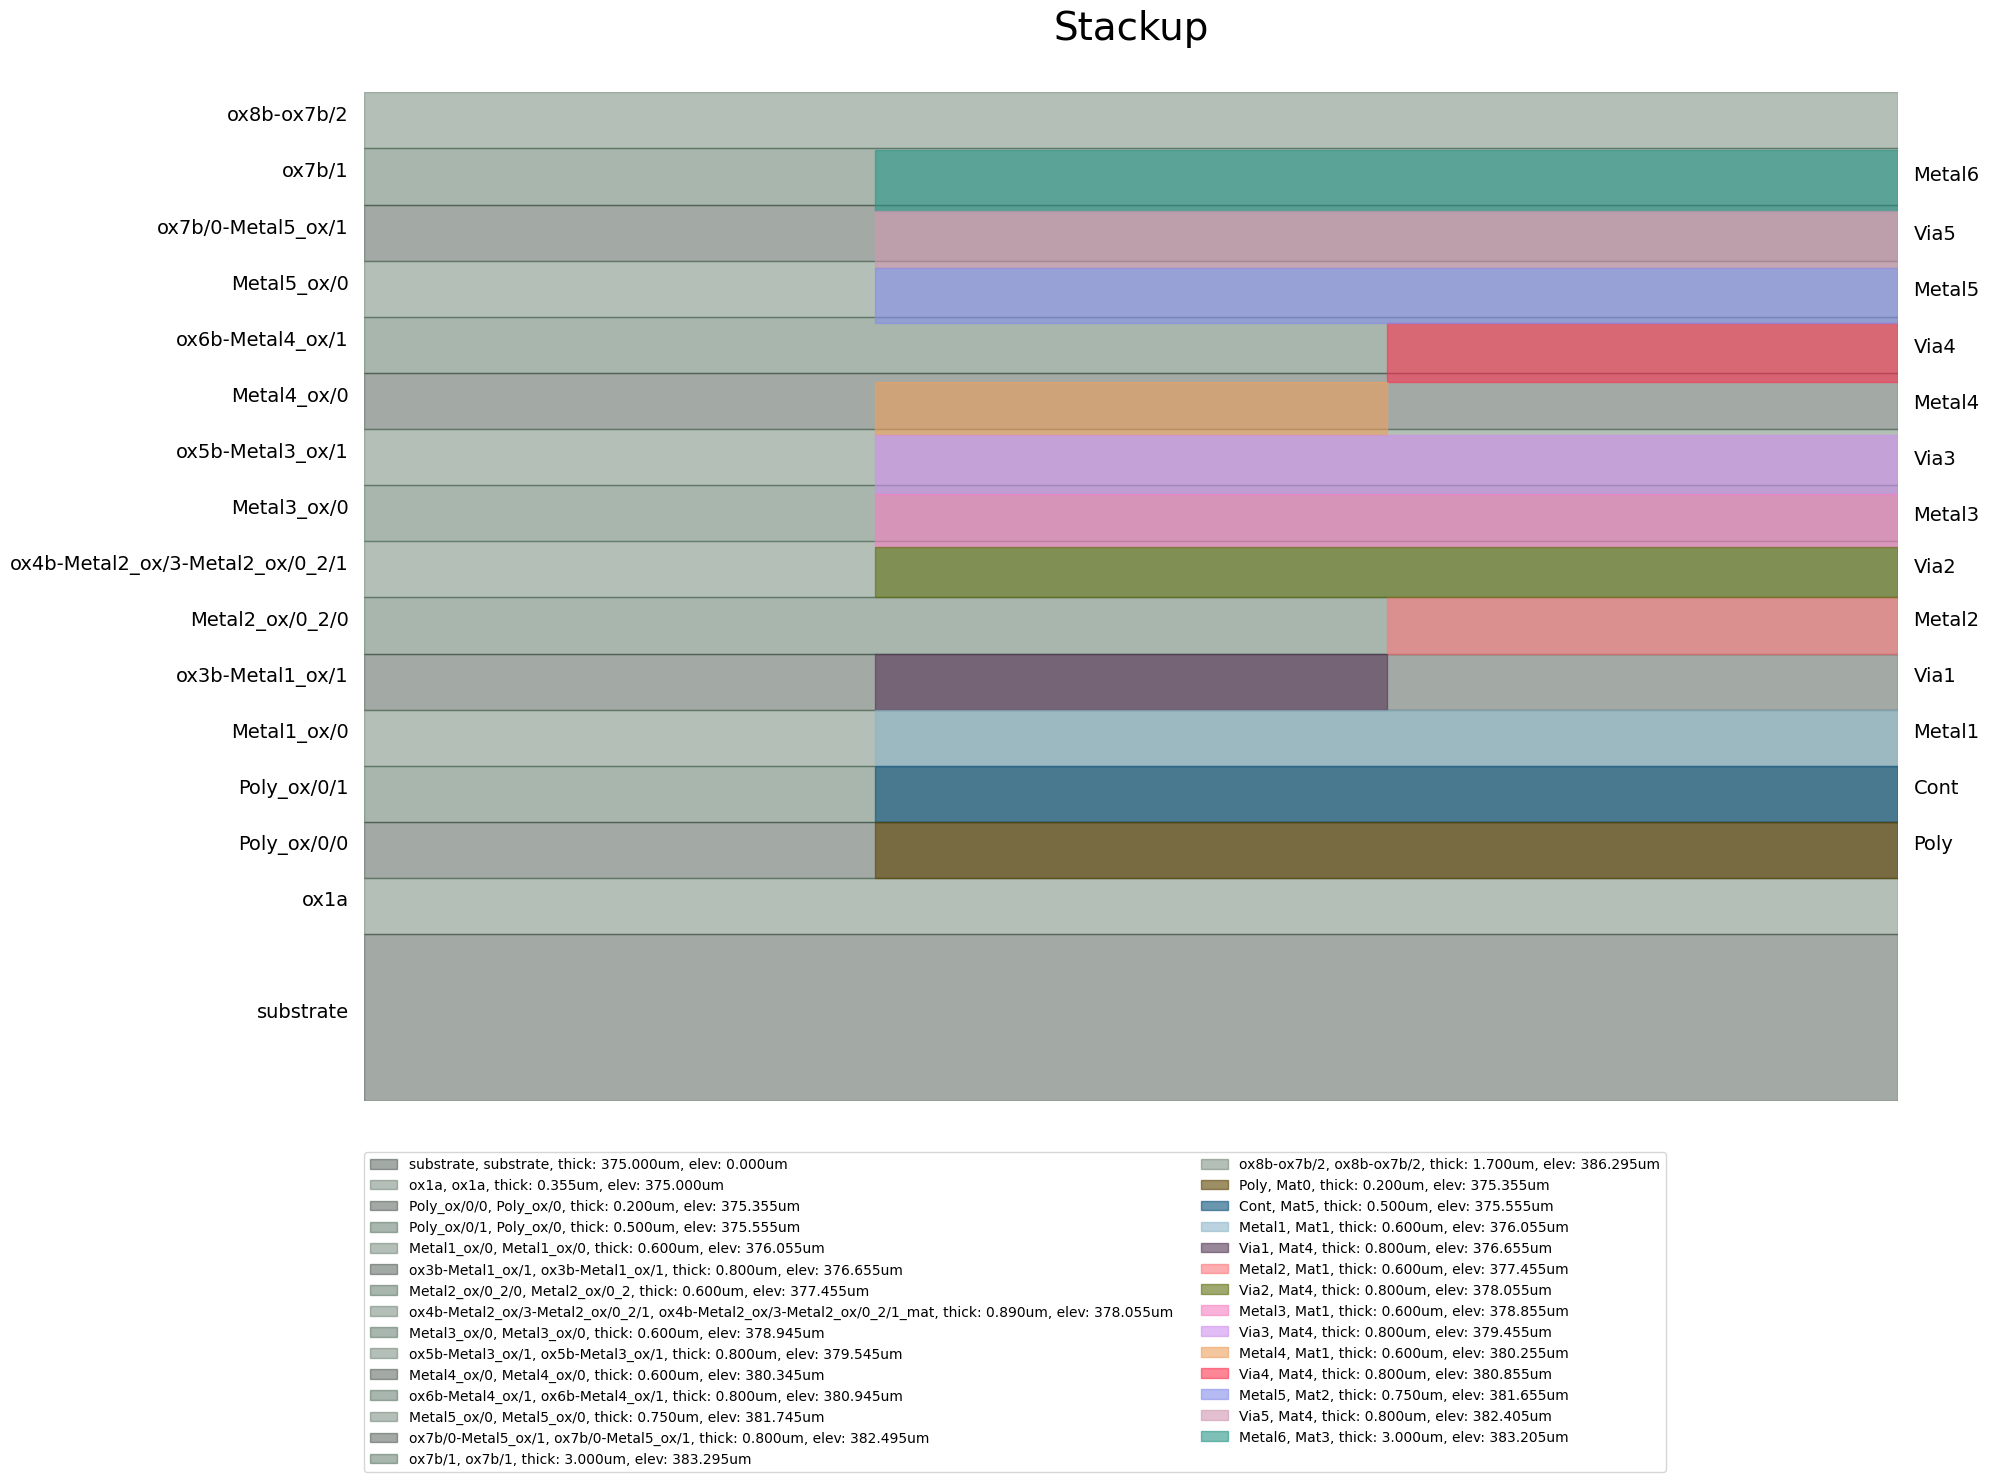

<module 'matplotlib.pyplot' from 'C:\\actions-runner\\_work\\pyaedt-examples\\pyaedt-examples\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
edb.stackup.plot()

### Save and close the EDB

The GDS file has been converted to an EDB and is ready for subsequent processing either in the
3D Layout UI of Electronics Desktop or using 
PyEDB. 
The following commands save and close the EDB. 

In [7]:
edb_path = os.path.join(temp_folder.name, "gds_design.aedb")
edb.save_as(edb_path)
edb.close()

PyEDB INFO: EDB file save completed in 0.0161 seconds.


PyEDB INFO: Close Edb file completed in 0.0160 seconds.


True

## View the layout
### Open the EDB in Electronics Desktop

The following command opens the EDB in Electronics Desktop. If you're running this example locally, you should see something like this:

<img src="_static/layout.png" width="800">

In [8]:
h3d = Hfss3dLayout(project=edb_path, version=AEDT_VERSION, new_desktop=NG_MODE)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_aa4340e6-0adb-46ea-88e7-15403b60848b.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


PyAEDT INFO: 2025.2 version started with process ID 7196.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: EDB folder C:\Users\ansys\AppData\Local\Temp\tmpbpczft0w.ansys\gds_design.aedb has been imported to project gds_design


PyAEDT INFO: Active Design set to 0;IC_Wo_Component1


PyAEDT INFO: Active Design set to 0;IC_Wo_Component1


PyAEDT INFO: Aedt Objects correctly read


### Close the HFSS 3D Layout 
The following command releases Ansys Electronics Desktop and closes the project.

In [9]:
h3d.release_desktop()

PyAEDT INFO: Desktop has been released and closed.


True